In [2]:
import numpy as np
import scipy.stats as stats
import scipy.io as spio
import matplotlib.pyplot as plt
import pandas as pd
import mne
from tqdm import tqdm
from blab.array import loadmat
import matplotlib
import seaborn as sns
import pingouin as pg
matplotlib.rcParams['pdf.fonttype'] = 42

In [3]:
df = pd.read_csv('mbrt_all_march10_stat_cluster.csv')
df_delta = pd.read_csv('mbrt_all_march10_stat_cluster_delta.csv')

In [1]:
bgr_mat = loadmat('../data/src_data/sources_Bgr_before_RH_Im1_foi=6Hz_df=2Hz_eLoreta.mat')['sourcebgr']
im1_mat = loadmat('../data/src_data/sources_Pre_RH_Im1_foi=6Hz_df=2Hz_0.5-4.5s_eLoreta.mat')['sourcepre']
im2_mat = loadmat('../data/src_data/sources_Pre_RH_Im2_foi=6Hz_df=2Hz_0.5-4.5s_eLoreta.mat')['sourcepre2']

bgr_arr = [i['avg']['pow'] for ind, i in enumerate(bgr_mat) if ind != 9]
plug = np.ones(len(bgr_arr[0]))*np.nan
bgr_arr.insert(9, plug)
bgr_arr = np.array(bgr_arr)

im1_arr = [i['avg']['pow'] for ind, i in enumerate(im1_mat) if ind != 9]
im1_arr.insert(9, plug)
im1_arr = np.array(im1_arr)

im2_arr = [i['avg']['pow'] for ind, i in enumerate(im2_mat) if ind != 9]
im2_arr.insert(9, plug)
im2_arr = np.array(im2_arr)

mask = bgr_mat[0]['inside'].astype(bool)

src_diff = (im2_arr - im1_arr)/bgr_arr
src_diff = src_diff[:15]

mbrt = df_delta.query('Day == "D2"')['MBRT ANY'].to_numpy()

mbrt_nanmask = ~np.isnan(mbrt)
mbrt = mbrt[mbrt_nanmask]
src_diff = src_diff[mbrt_nanmask].T
corr_plug = (np.nan, np.nan)

arr = [corr_plug if np.isnan(i).any() else stats.pearsonr(mbrt, i) for i in src_diff]
arr = np.array(arr)
arr[~mask] *= np.nan

NameError: name 'loadmat' is not defined

In [98]:
np.isnan(arr[:, 0]).sum()

12641

In [102]:
template = bgr_mat[0].copy()
template['avg']['pow'] = arr[:, 1]
sas = {'corr_pval': [template]}
spio.savemat('../data/src_data/sources_corr-pval_D2_Pre_RH_foi=6Hz_df=2Hz_0.5-4.5s_eLoreta.mat', sas)

In [95]:
loadmat('../data/src_data/sources_Pre_RH_Im2_foi=6Hz_df=2Hz_0.5-4.5s_eLoreta.mat').keys()

dict_keys(['sourcepre2'])

True

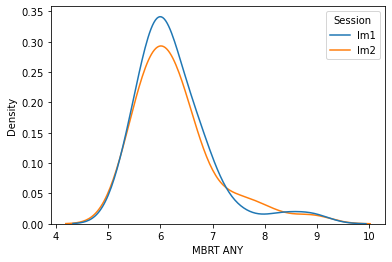

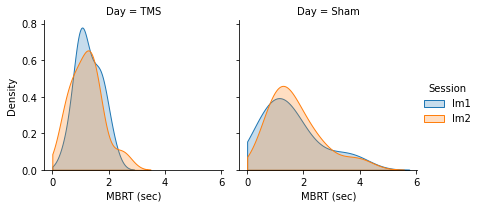

In [28]:
sns.kdeplot(x="MBRT ANY", hue="Session", data=df)
temp = df[['Day', 'Session', 'MBRT ANY']]
temp = temp.replace({"D2": "TMS", "D3":"Sham"}).query("Day != 'D1'").rename(columns={'MBRT ANY': "MBRT (sec)"})
temp['MBRT (sec)'] -= 5
g = sns.FacetGrid(temp, col="Day", hue="Session")
g.map(sns.kdeplot, "MBRT (sec)", fill=True, clip=(0, None))
g.add_legend()
g.savefig("../plots/MBRT_MARCH10_TMS-SHAM_KDEPLOT.pdf")

,Day,Session,MBRT
30,TMS,Im1,6.420
31,TMS,Im1,6.092
32,TMS,Im1,6.120
33,TMS,Im1,5.924
34,TMS,Im1,6.572
35,TMS,Im1,6.760
36,TMS,Im1,7.112
37,TMS,Im1,6.728
38,TMS,Im1,6.168
39,TMS,Im1,NaN
